In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('BikeRental.csv')

In [4]:
df.head(30)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [7]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

C:\Users\Marvin\AppData\Local\Temp\ipykernel_3900\2240960210.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


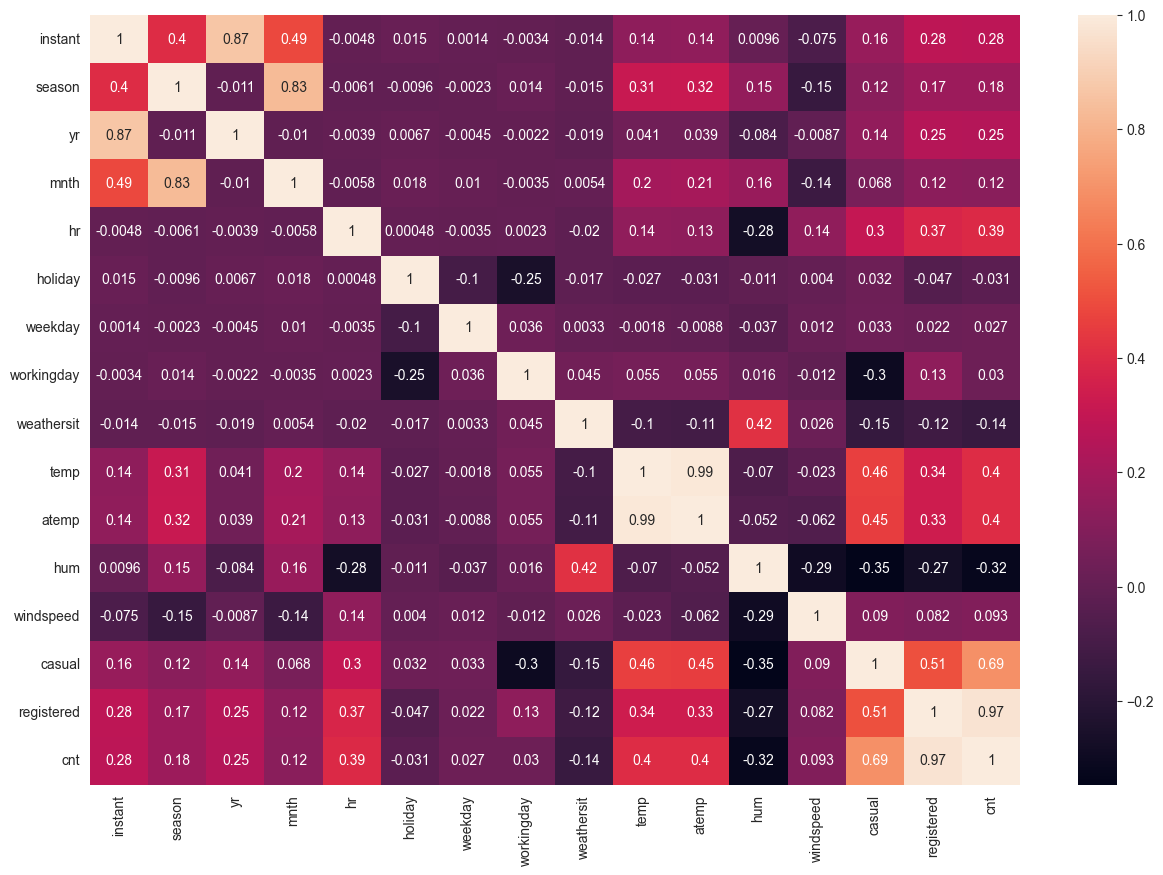

In [8]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [5]:
df_copy = df.copy()
df_copy.drop(['instant', 'dteday', 'casual', 'registered','atemp','workingday','season'], axis=1, inplace=True)

In [8]:
df['yr'].value_counts()

1    8734
0    8645
Name: yr, dtype: int64

In [5]:
df_copy.head()

,yr,mnth,hr,holiday,weekday,weathersit,temp,hum,windspeed,cnt
0,0,1,0,0,6,1,0.24,0.81,0.0,16
1,0,1,1,0,6,1,0.22,0.80,0.0,40
2,0,1,2,0,6,1,0.22,0.80,0.0,32
3,0,1,3,0,6,1,0.24,0.75,0.0,13
4,0,1,4,0,6,1,0.24,0.75,0.0,1


In [6]:
df_copy = pd.get_dummies(df_copy,columns =['hr','mnth','weekday','weathersit'], drop_first=True)

In [7]:
df_copy.head()

,yr,holiday,temp,hum,windspeed,cnt,hr_1,hr_2,hr_3,hr_4,...,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,weathersit_4
0,0,0,0.24,0.81,0.0,16,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0.22,0.80,0.0,40,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0.22,0.80,0.0,32,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0.24,0.75,0.0,13,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0.24,0.75,0.0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [8]:
df_copy.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'cnt', 'hr_1', 'hr_2',
       'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10',
       'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18',
       'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23', 'mnth_2', 'mnth_3',
       'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3',
       'weathersit_4'],
      dtype='object')

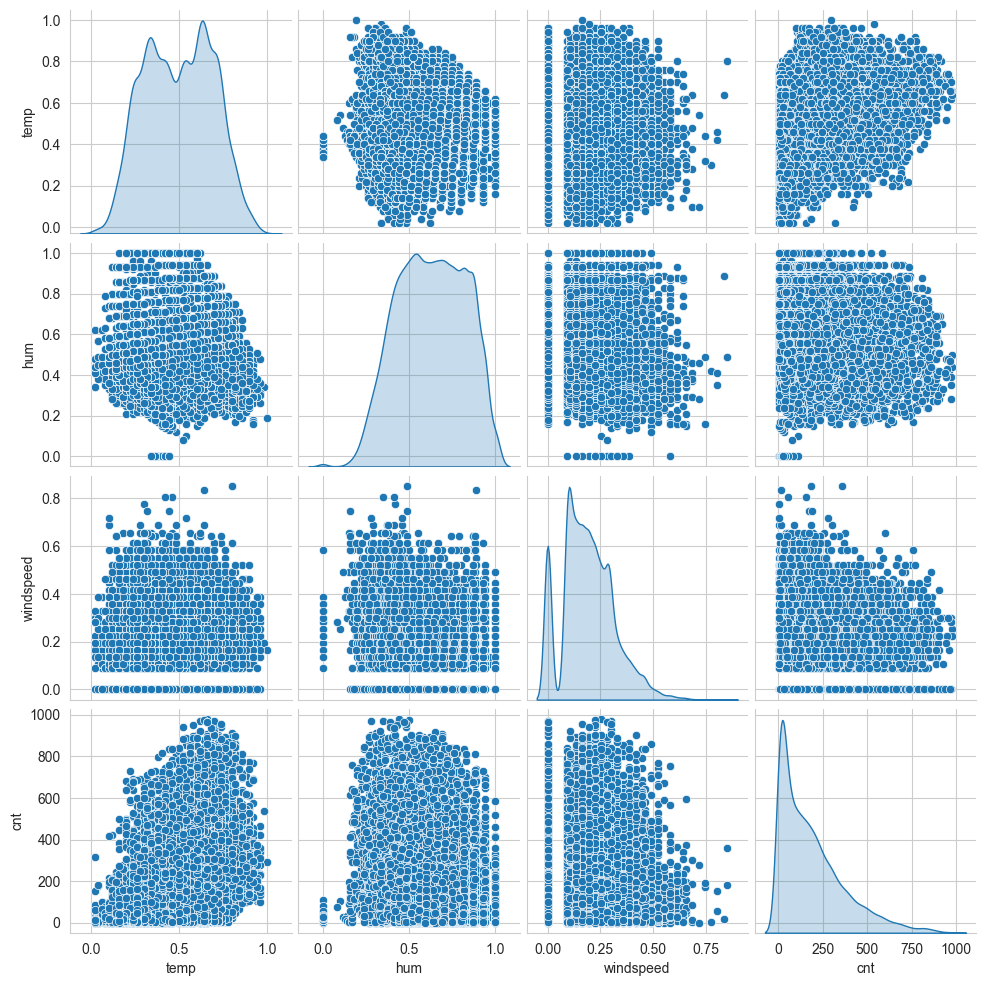

In [9]:
df_numeric = df[[ 'temp', 'hum', 'windspeed','cnt']]
sns.pairplot(data=df_numeric, diag_kind='kde')

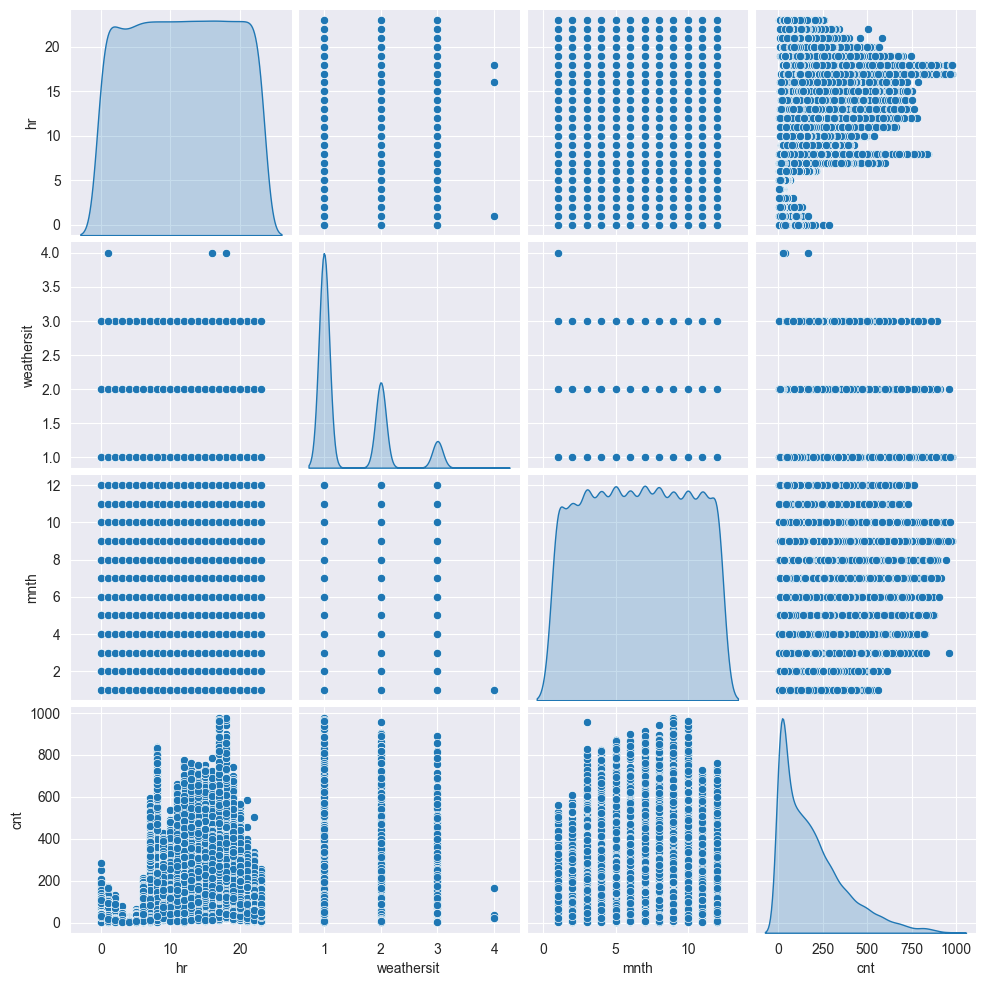

In [59]:
df_nonnumeric = df[[ 'hr','weathersit','mnth','cnt']]
sns.pairplot(data=df_nonnumeric, diag_kind='kde')

In [13]:
sns.set_style("whitegrid", {'axes.grid' : False})

In [ ]:
sns.jointplot(x='hr', y='cnt', data=df)

In [ ]:
sns.jointplot(x='mnth', y='cnt', data=df)

In [ ]:
sns.jointplot(x='holiday', y='cnt', data=df)

In [7]:
import sklearn.model_selection
ts_cv = sklearn.model_selection.TimeSeriesSplit(n_splits=5)

In [16]:
df_copy.describe()

,yr,holiday,temp,hum,windspeed,cnt,hr_1,hr_2,hr_3,hr_4,...,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,weathersit_4
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.502561,0.028770,0.496987,0.627229,0.190098,189.463088,0.041659,0.041142,0.040106,0.040106,...,0.085333,0.142643,0.141147,0.142413,0.142183,0.143104,0.144542,0.261465,0.081650,0.000173
std,0.500008,0.167165,0.192556,0.192930,0.122340,181.387599,0.199816,0.198623,0.196213,0.196213,...,0.279384,0.349719,0.348184,0.349484,0.349248,0.350189,0.351649,0.439445,0.273839,0.013138
min,0.000000,0.000000,0.020000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.340000,0.480000,0.104500,40.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.500000,0.630000,0.194000,142.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.660000,0.780000,0.253700,281.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,0.850700,977.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
df_copy.head()

,yr,holiday,temp,hum,windspeed,cnt,hr_1,hr_2,hr_3,hr_4,...,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,weathersit_4
0,0,0,0.24,0.81,0.0,16,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0.22,0.80,0.0,40,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0.22,0.80,0.0,32,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0.24,0.75,0.0,13,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0.24,0.75,0.0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [9]:
y = df_copy['cnt']
X = df_copy.drop('cnt', axis=1)

In [10]:
all_splits = list(ts_cv.split(X, y))
train_idx, test_idx = all_splits[4]

In [11]:
x_train = X.iloc[train_idx]
y_train = y.iloc[train_idx]
x_test = X.iloc[test_idx]
y_test = y.iloc[test_idx]
y_test_meandev = sum((y_test - y_train.mean())**2)

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [13]:
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.6200761042769593

In [14]:
#calc pseudo r2
1 - (sum((y_test - lr.predict(x_test))**2) / y_test_meandev)

0.6481375950296933

In [16]:
from sklearn.linear_model import RidgeCV
ridge = RidgeCV(cv=ts_cv, alphas=[0,1e-10,1e-5,1e-3,1e-2,1e-1,0.1, 1.0, 10.0])

In [17]:
result = ridge.fit(X.iloc[train_idx], y.iloc[train_idx])
result.score(X.iloc[test_idx], y.iloc[test_idx])

0.6200761042768959

In [18]:
1 - (sum((y_test - result.predict(x_test))**2) / y_test_meandev)

0.6481375950296333

In [20]:
from sklearn.svm import SVR

svr = SVR()
SVRparameters = {'kernel': ["linear", "rbf"],
              'C': [1.0, 3.0, 5.0, 8.0, 10.0],
              'epsilon': [0.0,0.001, 0.025, 0.05, 0.075, 0.1],
              'gamma' : ['scale', 'auto']}
SVRGrid = GridSearchCV(svr, SVRparameters, cv=ts_cv,n_jobs=-1)

In [58]:
SVRGrid.fit(X.iloc[train_idx], y.iloc[train_idx])
SVRGrid.score(X.iloc[test_idx], y.iloc[test_idx])


KeyboardInterrupt: 

In [24]:
SVRGrid.best_params_

{'C': 10.0, 'epsilon': 0.0, 'gamma': 'scale', 'kernel': 'linear'}

In [22]:
svr = SVR(C = 10.0, epsilon = 0.0, gamma = 'scale', kernel = 'linear')
svr.fit(X.iloc[train_idx], y.iloc[train_idx])
svr.score(X.iloc[test_idx], y.iloc[test_idx])


0.5660956933479382

In [23]:
1 - (sum((y_test - svr.predict(x_test))**2) / y_test_meandev)

0.5981442215551882

In [24]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
parameters = {'n_estimators': [100, 200, 300, 400, 500],
              'max_depth': [10, 20, 30, 40, 50],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}
grid = GridSearchCV(rf, parameters, cv=ts_cv,n_jobs=-1)
grid.fit(X.iloc[train_idx], y.iloc[train_idx])
grid.score(X.iloc[test_idx], y.iloc[test_idx])

0.7309017406920586

In [25]:
grid.best_params_

{'max_depth': 40,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [26]:
rf = RandomForestRegressor(**grid.best_params_)
rf.fit(X.iloc[train_idx], y.iloc[train_idx])
# rf.score(X.iloc[test_idx], y.iloc[test_idx])
1 - (sum((y_test - rf.predict(x_test))**2) / y_test_meandev)

0.7489794442520818

In [27]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor()

In [28]:
mlp.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [28]:
# Neural Network for regression 
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(max_iter=10000)
parameters = {
               'activation' : ['identity', 'logistic', 'tanh', 'relu'],
            'solver' : ['lbfgs', 'sgd', 'adam'],
            'hidden_layer_sizes': [
             (1,),(2,),(3,),(4,),(5,),(6,),(7,),(8,),(9,),(10,),(11,), (12,),(13,),(14,),(15,),(16,),(17,),(18,),(19,),(20,),(21,)
             ]}
MLPgrid = GridSearchCV(mlp, parameters, cv=ts_cv,n_jobs=-1, verbose=4)

In [35]:
MLPgrid.fit(X.iloc[train_idx], y.iloc[train_idx])

Fitting 5 folds for each of 252 candidates, totalling 1260 fits


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=MLPRegressor(max_iter=10000), n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(1,), (2,), (3,), (4,), (5,),
                                                (6,), (7,), (8,), (9,), (10,),
                                                (11,), (12,), (13,), (14,),
                                                (15,), (16,), (17,), (18,),
                                                (19,), (20,), (21,)],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             verbose=4)

In [36]:
MLPgrid.score(X.iloc[test_idx], y.iloc[test_idx])

0.830804765963624

In [37]:
MLPgrid.best_params_

{'activation': 'tanh', 'hidden_layer_sizes': (17,), 'solver': 'adam'}

In [29]:
mlp = MLPRegressor(activation='tanh',hidden_layer_sizes=(17,),solver='adam', max_iter=10000,random_state=1)
mlp.fit(X.iloc[train_idx], y.iloc[train_idx])
mlp.score(X.iloc[test_idx], y.iloc[test_idx])

0.8647608532212785

In [30]:
1- (sum((y_test - mlp.predict(x_test))**2) / y_test_meandev)

0.8747497275970697